# Commitment of Traders

In [16]:
library(package = Quandl)
library(package = ggplot2)
library(binhf)

In [17]:
Quandl.api_key(api_key = "8u9meDr5sQxGim8ATVt6")

In [18]:
cot_tickers = list(c('WTI_Crude_Oil','CFTC/LLS_F_ALL'),
               c('Gold','CFTC/GC_F_ALL'),
               c('Natural Gas','CFTC/NG_F_ALL'),
               c('Silver','CFTC/SI_F_ALL'),
               c('Corn','CFTC/C_F_ALL'),
               c('Wheat','CFTC/KW_F_ALL'))
cot_tickers

[[1]]
[1] "WTI_Crude_Oil"  "CFTC/LLS_F_ALL"

[[2]]
[1] "Gold"          "CFTC/GC_F_ALL"

[[3]]
[1] "Natural Gas"   "CFTC/NG_F_ALL"

[[4]]
[1] "Silver"        "CFTC/SI_F_ALL"

[[5]]
[1] "Corn"         "CFTC/C_F_ALL"

[[6]]
[1] "Wheat"         "CFTC/KW_F_ALL"

In [19]:
spot_prices = list(c('WTI_Crude_Oil','CHRIS/CME_CL1'),
               c('Gold','CHRIS/CME_GC1'),
               c('Natural Gas','CHRIS/CME_NG1'),
               c('Silver','CHRIS/SHFE_AG1'),
               c('Corn','CHRIS/CME_C1'),
               c('Wheat','CHRIS/CME_W1'))

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


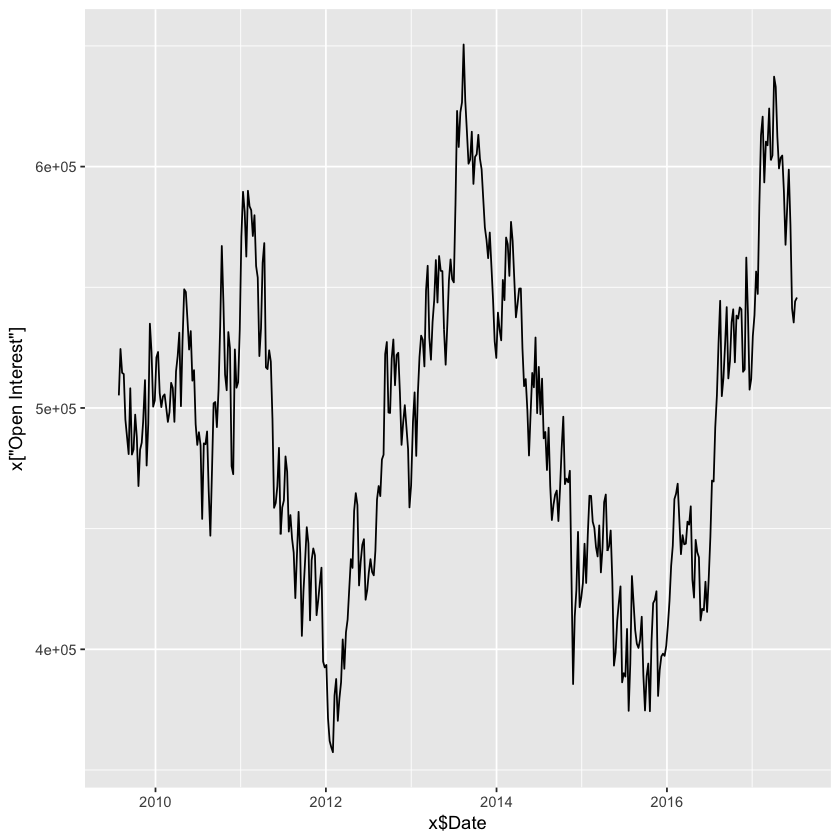

In [20]:
x = Quandl(code = 'CFTC/LLS_F_ALL')
ggplot(data = x, aes(x=x$Date,y = x['Open Interest'])) + geom_line()

## COT Report

In [21]:
cot_report = function(product, start, end, periodicity) {
    df_temp = Quandl(code = cot_tickers[[grep(product,x = cot_tickers)]][2], start_date = start, end_date = end, collapse = periodicity)
    df_cot = Quandl(code = spot_prices[[grep(product,x = spot_prices)]][2], start_date = start, end_date = end, collapse = periodicity)
    df1 = merge(df_temp, df_cot, by='Date')
    df1['Commercial'] = df1['Producer/Merchant/Processor/User Longs'] - df1['Producer/Merchant/Processor/User Shorts']
    df1['Money_Managers'] = df1['Money Manager Longs'] - df1['Money Manager Shorts']
    df1['Swap_Dealers'] = df1['Swap Dealer Longs'] - df1['Swap Dealer Shorts']
    df1['Total_Reportable'] = df1['Total Reportable Longs'] - df1['Total Reportable Shorts']
    df1['Non_Reportable'] = df1['Non Reportable Longs'] - df1['Non Reportable Shorts']
    df1[product] = df1['Settle']
    df = subset(x=df1, select = c('Date','Commercial', 'Money_Managers','Swap_Dealers','Total_Reportable','Non_Reportable',product))
    return(df)
}

In [22]:
x = cot_report(product='Gold',
          start='01-01-2010',
          end='01-01-2017',
          periodicity='weekly')
tail(x)

,Date,Commercial,Money_Managers,Swap_Dealers,Total_Reportable,Non_Reportable,Gold
360,2016-11-27,-98195,124389,-93977,-25087,25087,1178.4
361,2016-12-04,-90588,106941,-77235,-16253,16253,1175.1
362,2016-12-11,-83428,82318,-71516,-18564,18564,1159.4
363,2016-12-18,-81173,68718,-68713,-20575,20575,1135.3
364,2016-12-25,-79344,53805,-54678,-19188,19188,1131.9
365,2017-01-01,-74447,43366,-46520,-22624,22624,1151.7


In [31]:
dualplot <- function(x1, y1, y2, x2 = x1, 
                     col = c("#C54E6D", "#009380"),
                     lwd = c(1, 1), colgrid = NULL,
                     mar = c(3, 6, 3, 6) + 0.1, 
                     ylab1 = paste(substitute(y1), collapse = ""), 
                     ylab2 = paste(substitute(y2), collapse = ""),
                     nxbreaks = 5, 
                     yleg1 = paste(gsub("\n$", "", ylab1), "(left axis)"), 
                     yleg2 = paste(ylab2, "(right axis)"),
                     ylim1 = NULL, ylim2 = NULL, ylim.ref = NULL,
                     xlab = "", main = NULL, legx = "topleft", legy = NULL, 
                     silent = FALSE, bty = "n", ...){
   # Base graphics function for drawing dual axis line plot.
   # Assumed to be two time series on a conceptually similar, non-identical scale 
   #
   # Assumes data is in sequence of x1 and of x2 ie ordered by time
   #
   # Use with caution! 
   # Please don't use to show growth rates and the original
   # series at the same time!
   #
   # Peter Ellis, 16-27 August 2016, GNU GPL-3
   # most parameters should be obvious:
   # x1 and y1 are the x and y coordinates for first line
   # x2 and y2 are the x and y coordinates for second line.  Often x2 will == x1, but can be overridden
   # ylim1 and ylim2 are the vertical limits of the 2 axes.  Recommended NOT to use these, as
   #    the default algorithm will set them in a way that makes the axes equivalent to using an index (for 
   #    positive data) or mean of each series +/- 3 standard deviations (if data include negatives)
   # ylim.ref the two numbers in the two series to use as the reference point for converting them to indices
   #    when drawing on the page.  If both elements are 1, both series will start together at the left of the plot.
   # nbreaks is number of breaks in horizontal axis
   # lwd and mar are graphics parameters (see ?par)
   # colgrid is colour of gridlines; if NULL there are no gridlines
   # ylab1 and ylab2 are the labels for the two y axes
   # yleg1 and yleg2 are the labels for the two series in the legend
   # xlab and main are for x label and main title as in plot()
   # legx and legy are x and y position fed through to legend()
   # ... is parameters to pass to legend()
   # Note that default colours were chosen by colorspace::rainbow_hcl(2, c = 80, l = 50)
   
   # strip excess attributes (eg xts etc) from the two vertical axis variables
   ylab1 <- as.character(ylab1)
   ylab2 <- as.character(ylab2)
   y1 <- as.numeric(y1)
   y2 <- as.numeric(y2)
   
   # is ylim.ref is NULL, calculate a good default
   if(is.null(ylim.ref)){
      if (length(y1) == length(y2)){
         ylim.ref <- c(1, 1)
      } else {
         if (min(x1) >  min(x2)){
            ylim.ref <- c(1, which(abs(x2 - min(x1)) == min(abs(x2 - min(x1)))))
         } else {
            ylim.ref <- c(which(abs(x1 - min(x2)) == min(abs(x1 - min(x2)))), 1)
         }
      }

      
   }

   
   oldpar <- par(mar = mar)
   xbreaks <- round(seq(from = min(c(x1, x2)), to = max(c(x1, x2)), length.out = nxbreaks))
   
   # unless ylim1 or ylim2 were set, we set them to levels that make it equivalent
   # to a graphic drawn of indexed series (if all data positive), or to the mean
   # of each series +/- three standard deviations if some data are negative
   if(is.null(ylim1) & is.null(ylim2)){
      if(min(c(y1, y2), na.rm = TRUE) < 0){
         message("With negative values ylim1 or ylim2 need to be chosen by a method other than treating both series visually as though they are indexed. Defaulting to mean value +/- 3 times the standard deviations.")
         ylim1 <- c(-3, 3) * sd(y1, na.rm = TRUE) + mean(y1, na.rm = TRUE)
         ylim2 <- c(-3, 3) * sd(y2, na.rm = TRUE) + mean(y2, na.rm = TRUE)
      }
      
      
      if(ylim.ref[1] > length(y1)){
         stop("ylim.ref[1] must be a number shorter than the length of the first series.")
      }
      if(ylim.ref[2] > length(y2)){
         stop("ylim.ref[2] must be a number shorter than the length of the second series.")
      }
      
      if(!silent) message("The two series will be presented visually as though they had been converted to indexes.")
      
      # convert the variables to indexes (base value of 1 at the time specified by ylim.ref)
      ind1 <- as.numeric(y1) / y1[ylim.ref[1]]
      ind2 <- as.numeric(y2) / y2[ylim.ref[2]]
      
      # calculate y axis limits on the "index to 1" scale
      indlimits <- range(c(ind1, ind2), na.rm = TRUE)
      
      # convert that back to the original y axis scales
      ylim1 = indlimits * y1[ylim.ref[1]]
      ylim2 = indlimits * y2[ylim.ref[2]]
   } else {
      if(!silent) warning("You've chosen to set at least one of the vertical axes limits manually.  Up to you, but it is often better to leave it to the defaults.")
   }
   
   # draw first series - with no axes.
   plot(x1, y1, type = "l", axes = FALSE, lwd = lwd[1],
        xlab = xlab, ylab = "", col = col[1], main = main, 
        xlim = range(xbreaks), ylim = ylim1)
   
   # add in the gridlines if wanted:
   if(!is.null(colgrid)){
      grid(lty = 1, nx = NA, ny = NULL, col = colgrid)   
      abline(v = xbreaks, col = colgrid)
   }
   
   # add in the left hand vertical axis and its label
   axis(2, col = col[1], col.axis= col[1], las=1 )  ## las=1 makes horizontal labels
   mtext(paste0("\n", ylab1, "\n"), side = 2, col = col[1], line = 1.5) 
   
   # Allow a second plot on the same graph
   par(new=TRUE)
   
   # Plot the second series:
   plot(x2, y2,   xlab="", ylab="", axes = FALSE, type = "l", lwd = lwd[2],
        col = col[2], xlim = range(xbreaks), ylim = ylim2)
   
   ## add second vertical axis (on right) and its label
   mtext(paste0("\n", ylab2, "\n"), side = 4, col = col[2], line = 4.5) 
   axis(4,  col = col[2], col.axis = col[2], las=1)
   
   # Draw the horizontal time axis
   axis(1, at = xbreaks, labels = xbreaks)
   
   # Add Legend
   legend(x = legx, y = legy, legend=c(yleg1, yleg2),
          text.col = col, lty = c(1, 1), lwd = lwd, col = col,
          bty = bty, ...)
   
   par(oldpar)
}

Warning message in dualplot(x1 = x$Date, y1 = x$Money_Managers, y2 = x$Gold, lwd = 1, :
“You've chosen to set at least one of the vertical axes limits manually.  Up to you, but it is often better to leave it to the defaults.”

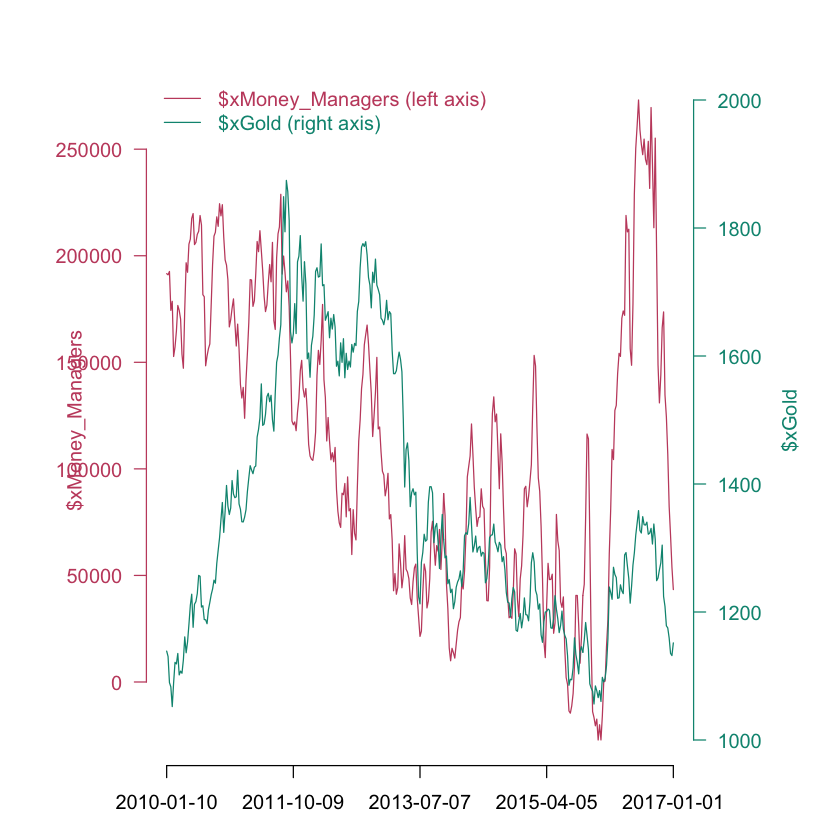

In [33]:
dualplot(x1=x$Date, 
         y1 = x$Money_Managers, 
         y2 = x$Gold,
         lwd=1,  # line width
         ylim2 = c(1000,2000)
        )

# Legacy Method of Reporting

In [25]:
cot_tickers_legacy = list(c('WTI_Crude_Oil','CFTC/LLS_F_L_ALL'),
               c('Gold','CFTC/GC_F_L_ALL'),
               c('Natural Gas','CFTC/NG_F_L_ALL'),
               c('Silver','CFTC/SI_F_L_ALL'),
               c('Corn','CFTC/C_F_L_ALL'),
               c('Wheat','CFTC/KW_F_L_ALL'))
cot_tickers

[[1]]
[1] "WTI_Crude_Oil"  "CFTC/LLS_F_ALL"

[[2]]
[1] "Gold"          "CFTC/GC_F_ALL"

[[3]]
[1] "Natural Gas"   "CFTC/NG_F_ALL"

[[4]]
[1] "Silver"        "CFTC/SI_F_ALL"

[[5]]
[1] "Corn"         "CFTC/C_F_ALL"

[[6]]
[1] "Wheat"         "CFTC/KW_F_ALL"

In [26]:
cot_report_legacy = function(product, start, end, periodicity) {
    df_temp = Quandl(code = cot_tickers_legacy[[grep(product,x = cot_tickers_legacy)]][2], start_date = start, end_date = end, collapse = periodicity)
    df_cot = Quandl(code = spot_prices[[grep(product,x = spot_prices)]][2], start_date = start, end_date = end, collapse = periodicity)
    df_new = merge(df_temp, df_cot, by='Date')
    df_new['Noncommercial'] = df_new['Noncommercial Long'] - df_new['Noncommercial Short']
    df_new['Commercial'] = df_new['Commercial Long'] - df_new['Commercial Short']
    df_new['Nonreportable'] = df_new['Nonreportable Positions Long'] - df_new['Nonreportable Positions Short']
    df_new[product] = df_new['Settle']
    df_new = subset(x=df_new, select = c('Date','Noncommercial', 'Commercial','Nonreportable',product))
    return(df_new)
}

In [27]:
x_legacy = cot_report_legacy(product='Gold',
          start='01-01-2010',
          end='01-01-2016',
          periodicity='weekly')
tail(x_legacy)

,Date,Noncommercial,Commercial,Nonreportable,Gold
308,2015-11-29,16302,-11983,-4319,1056.2
309,2015-12-06,9750,-2911,-6839,1084.5
310,2015-12-13,19623,-13997,-5626,1076.9
311,2015-12-20,13656,-8266,-5390,1066.2
312,2015-12-27,26427,-22251,-4176,1077.2
313,2016-01-03,19102,-15335,-3767,1060.2


Warning message in dualplot(x1 = x_legacy$Date, y1 = x_legacy$Commercial, y2 = x_legacy$Gold, :
“You've chosen to set at least one of the vertical axes limits manually.  Up to you, but it is often better to leave it to the defaults.”

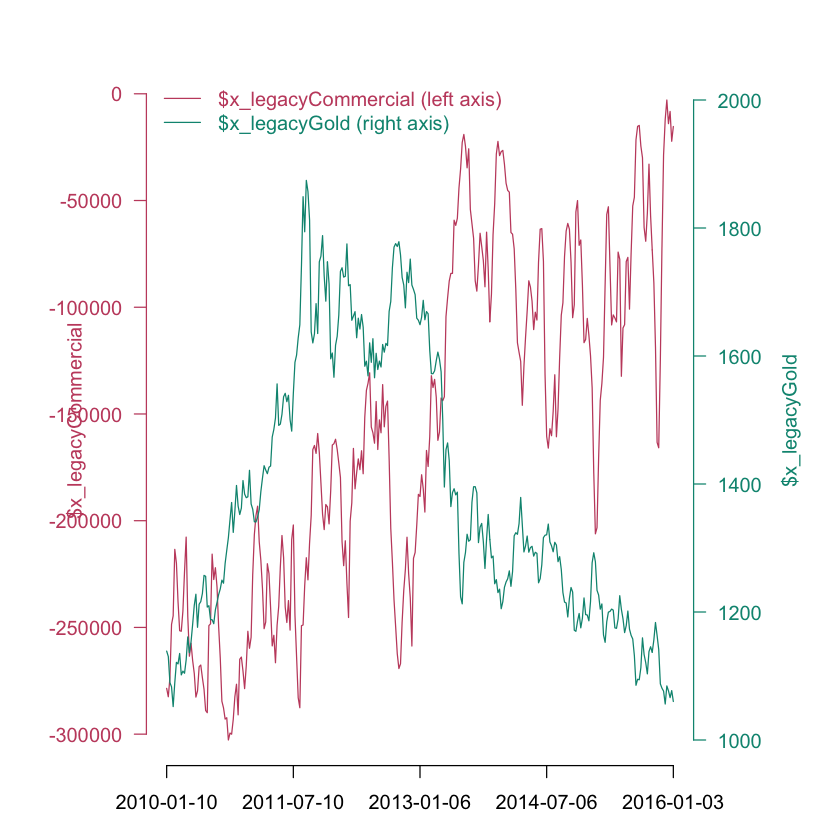

In [28]:
dualplot(x1=x_legacy$Date, 
         y1 = x_legacy$Commercial, 
         y2 = x_legacy$Gold,
         lwd=1,  # line width
         ylim2 = c(1000,2000)
        )

# Weekly Changes in COT

In [29]:
weekly_delta = function(product, start, end, periodicity) {
    #Generate DataFrame w/COT positions from function
    df = cot_report(product=product, start = start, end = end, periodicity = periodicity)
    #Set the Dates as the rownames
    rownames(x=df) = df$Date
    df1 = df[, -1]
    
    #Manipulate Data
    Commercial = diff(df1$Commercial, lag=1)
    Money_Managers = diff(df1$Money_Managers, lag=1)
    Swap_Dealers = diff(df1$Swap_Dealers, lag=1)
    Non_Reportable = diff(df1$Non_Reportable, lag=1)
    Total_Reportable = diff(df1$Total_Reportable, lag=1)
    Spot_Price = round((diff(log(df1$Gold), lag=1) * 100), 2)
    Dates = df[-1,1]
    
    #Integrate data
    df2 = data.frame(Dates, Commercial,Money_Managers,Swap_Dealers,Non_Reportable,Total_Reportable,Spot_Price)
    rownames(df2) = df2$Dates
    return(df2[,-1])
}


In [30]:
chg = weekly_delta('Gold', start='01-01-2015', end='01-01-2017', periodicity='weekly')
tail(chg)

,Commercial,Money_Managers,Swap_Dealers,Non_Reportable,Total_Reportable,Spot_Price
2016-11-27,8704,-10291,-910,2781,-2781,-2.54
2016-12-04,7607,-17448,16742,-8834,8834,-0.28
2016-12-11,7160,-24623,5719,2311,-2311,-1.35
2016-12-18,2255,-13600,2803,2011,-2011,-2.10
2016-12-25,1829,-14913,14035,-1387,1387,-0.30
2017-01-01,4897,-10439,8158,3436,-3436,1.73
